<a href="https://colab.research.google.com/github/sunyux/-LeNet-5-for-CIFAR10/blob/main/Lenet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 10


trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

NameError: ignored

In [ ]:
#for the step 3

class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3,stride=1, padding=0)
        self.pool=nn.AvgPool2d(2,1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3,stride=1, padding=0)
        #self.pool=nn.AvgPool2d(2,1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3,stride=1, padding=0)
       # self.pool=nn.AvgPool2d(2,1)
        #self.conv4 = nn.Conv2d(32, 64, kernel_size=3,stride=1, padding=1)
      #  self.pool=nn.AvgPool2d(2,1)
       # self.conv5 = nn.Conv2d(64, 128, kernel_size=3,stride=1, padding=1)
        self.fc1 = nn.Linear(93312, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x=self(F.relu(self.conv1(x)))
        x=self.pool(F.relu(self.conv2(x)))
        x=self(F.relu(self.conv3(x)))
       # x=self.pool(F.relu(self.conv4(x)))
      #  x=self.pool(F.relu(self.conv5(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = LeNet()
print(net)

LeNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (pool): AvgPool2d(kernel_size=2, stride=1, padding=0)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=93312, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [ ]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.tanh(self.conv1(x))
        x = F.avg_pool2d(x,2)
        x = F.tanh(self.conv2(x))
        x = F.avg_pool2d(x,2)
        x = x.view(x.size(0), -1)
        x = F.tanh(self.fc1(x))
        x = F.tanh(self.fc2(x))
        x = self.fc3(x)
        return x

net = LeNet()

In [ ]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0)

In [ ]:
                                                                                                                                                                                                                                                                                                 #train the model
def train(dataloader, model, criterion, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        _,X = torch.max(pred, dim = 1)
        loss = criterion(X.float(), y.float())
        loss.requires_grad = True
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [ ]:
#test the model
train_error=[]
def test(dataloader, model, criterion):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += criterion(pred, y.view(1,10).float()).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    train_error.append(1-correct)
    print(f"Accuracy: {(100*correct):>0.1f}%")



In [ ]:
#test the model
test_error=[]
def test2(dataloader, model, criterion):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += criterion(pred, y.view(1,10).float()).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    test_error.append(1-correct)
    print(f"Accuracy: {(100*correct):>0.1f}%")

In [ ]:
epochs = 25
for t in range(epochs):
    print(f"Epoch  {t+1}\n-------------------------------")
    train(trainloader, net, criterion, optimizer)
    test2(testloader, net, criterion)
    test(trainloader, net, criterion)
print("Done!")

Epoch  1
-------------------------------


RuntimeError: ignored

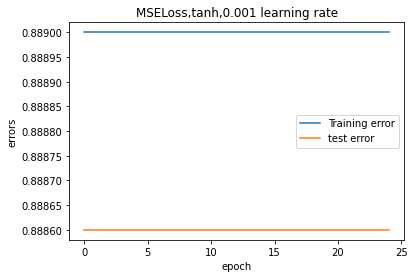

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_error, label='Training error')
plt.plot(test_error, label='test error')
plt.xlabel('epoch')
plt.ylabel('errors')
plt.title('MSELoss,tanh,0.001 learning rate')
plt.legend()

In [ ]:
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


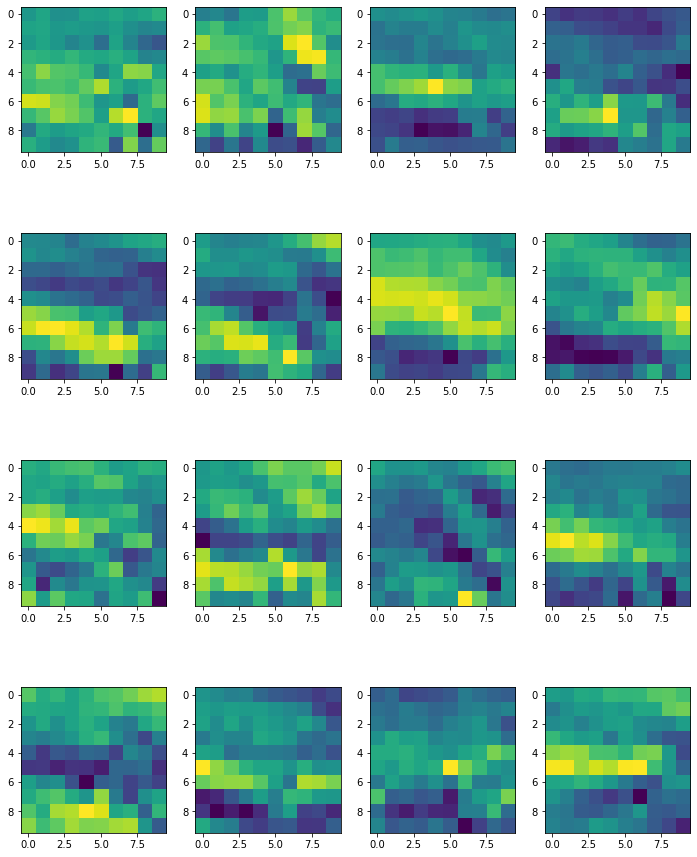

In [ ]:
net.conv2.register_forward_hook(get_activation('conv2'))
data, _ = trainset[4]
data=data.to(device)
data.unsqueeze_(0)
output = net(data)
act = activation['conv2'].squeeze()

fig, axarr = plt.subplots(act.size(0)//4,4,figsize=(12, 16))
k=0
for i in range(act.size(0)//4):
        for j in range(4):
          axarr[i,j].imshow(act[k].detach().cpu().numpy())
          k+=1  
          plt.savefig('fm2.png')

# New Section